In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
data = pd.read_csv('counterfeit_train.csv')
df = pd.DataFrame(data)

In [3]:
df

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402
...,...,...,...,...,...,...,...,...,...,...,...,...
6813,OYN80,8.535,Area046,1995,204.1452,Hreplacements,mild,0.112963,DownTown,Tier 1,Small,2070.4520
6814,ACW12,20.650,Area046,1995,235.1088,Hreplacements,mild,0.131103,DownTown,Tier 1,Small,2126.3792
6815,OPM10,20.000,Area017,2005,193.6292,Antimalarial,critical,0.105096,DownTown,Tier 2,Unknown,2119.7212
6816,SLY12,10.180,Area045,2000,162.8682,Statins,mild,0.099957,DownTown,Tier 2,Unknown,1485.2138


In [4]:
df.isnull().sum()

Medicine_ID               0
Counterfeit_Weight     1166
DistArea_ID               0
Active_Since              0
Medicine_MRP              0
Medicine_Type             0
SidEffect_Level           0
Availability_rating       0
Area_Type                 0
Area_City_Type            0
Area_dist_level           0
Counterfeit_Sales         0
dtype: int64

In [5]:
df['Area_Type'].max()

'MidTownResidential'

In [6]:
df['Counterfeit_Sales'].groupby(df['Area_Type']).sum().sort_values(ascending=False)

Area_Type
DownTown              1.084975e+07
CityLimits            2.772607e+06
Industrial            1.535692e+06
MidTownResidential    3.909705e+05
Name: Counterfeit_Sales, dtype: float64

In [7]:
df['Area_Type'].value_counts()

Area_Type
DownTown              4481
MidTownResidential     873
CityLimits             735
Industrial             729
Name: count, dtype: int64

In [8]:
df['Medicine_Type'].min()

'Analgesics'

In [9]:
df['Medicine_Type'].value_counts()

Medicine_Type
Hreplacements         976
Antibiotics           970
Antiseptics           724
OralContraceptives    694
Antipyretics          536
Cardiac               522
Mstablizers           514
Tranquilizers         420
Analgesics            356
Antimalarial          339
Antacids              206
Statins               167
MuscleRelaxants       139
Antifungal            111
Stimulants             95
Antiviral              49
Name: count, dtype: int64

In [10]:
df['Counterfeit_Sales'].min()

146.29

C:\Users\user\AppData\Local\Temp\ipykernel_7172\2530194722.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Medicine_MRP', data=df, palette='rainbow')


<Axes: xlabel='Medicine_MRP'>

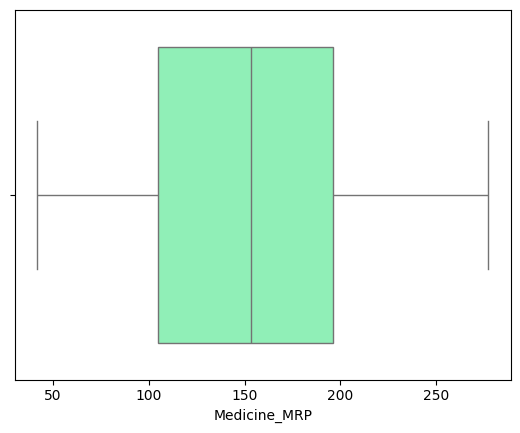

In [11]:
sns.boxplot(x='Medicine_MRP', data=df, palette='rainbow')

In [13]:
label_encoder = LabelEncoder()
df['Medicine_Type'] = label_encoder.fit_transform(df['Medicine_Type'])
df['Area_Type'] = label_encoder.fit_transform(df['Area_Type'])
df['Area_City_Type'] = label_encoder.fit_transform(df['Area_City_Type'])
df['Area_dist_level'] = label_encoder.fit_transform(df['Area_dist_level'])
df['SidEffect_Level'] = label_encoder.fit_transform(df['SidEffect_Level'])

In [14]:
df

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,4,0,0.070422,1,0,2,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,10,1,0.013000,0,2,1,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,8,1,0.060783,1,0,2,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,12,1,0.065555,1,0,2,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,9,0,0.248859,3,0,2,158.9402
...,...,...,...,...,...,...,...,...,...,...,...,...
6813,OYN80,8.535,Area046,1995,204.1452,9,1,0.112963,1,0,2,2070.4520
6814,ACW12,20.650,Area046,1995,235.1088,9,1,0.131103,1,0,2,2126.3792
6815,OPM10,20.000,Area017,2005,193.6292,4,0,0.105096,1,1,3,2119.7212
6816,SLY12,10.180,Area045,2000,162.8682,13,1,0.099957,1,1,3,1485.2138


In [15]:
df.drop(['Medicine_ID', 'DistArea_ID'], axis=1, inplace=True)

In [16]:
df['Age'] = 2025 - df['Active_Since']
df.drop(['Active_Since'], axis=1, inplace=True)
df

,Counterfeit_Weight,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,Age
0,13.100,160.2366,4,0,0.070422,1,0,2,1775.5026,30
1,NaN,110.4384,10,1,0.013000,0,2,1,3069.1520,42
2,9.025,259.4092,8,1,0.060783,1,0,2,2603.0920,30
3,11.800,99.9830,12,1,0.065555,1,0,2,1101.7130,30
4,NaN,56.4402,9,0,0.248859,3,0,2,158.9402,42
...,...,...,...,...,...,...,...,...,...,...
6813,8.535,204.1452,9,1,0.112963,1,0,2,2070.4520,30
6814,20.650,235.1088,9,1,0.131103,1,0,2,2126.3792,30
6815,20.000,193.6292,4,0,0.105096,1,1,3,2119.7212,20
6816,10.180,162.8682,13,1,0.099957,1,1,3,1485.2138,25


In [17]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df

,Counterfeit_Weight,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,Age
0,0.431378,0.503175,0.266667,0.0,0.174857,0.333333,0.0,0.666667,0.124809,0.500000
1,NaN,0.291626,0.666667,1.0,0.000000,0.000000,1.0,0.333333,0.223911,1.000000
2,0.188747,0.924472,0.533333,1.0,0.145506,0.333333,0.0,0.666667,0.188208,0.500000
3,0.353974,0.247211,0.800000,1.0,0.160039,0.333333,0.0,0.666667,0.073192,0.500000
4,NaN,0.062236,0.600000,0.0,0.718227,1.000000,0.0,0.666667,0.000969,1.000000
...,...,...,...,...,...,...,...,...,...,...
6813,0.159571,0.689704,0.600000,1.0,0.304401,0.333333,0.0,0.666667,0.147404,0.500000
6814,0.880917,0.821241,0.600000,1.0,0.359641,0.333333,0.0,0.666667,0.151688,0.500000
6815,0.842215,0.645031,0.266667,0.0,0.280446,0.333333,0.5,1.000000,0.151178,0.083333
6816,0.257517,0.514354,0.866667,1.0,0.264798,0.333333,0.5,1.000000,0.102571,0.291667


In [18]:
df['Counterfeit_Weight'].fillna(df['Counterfeit_Weight'].mean(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_7172\2887692045.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Counterfeit_Weight'].fillna(df['Counterfeit_Weight'].mean(), inplace=True)


In [19]:
df

,Counterfeit_Weight,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,Age
0,0.431378,0.503175,0.266667,0.0,0.174857,0.333333,0.0,0.666667,0.124809,0.500000
1,0.491816,0.291626,0.666667,1.0,0.000000,0.000000,1.0,0.333333,0.223911,1.000000
2,0.188747,0.924472,0.533333,1.0,0.145506,0.333333,0.0,0.666667,0.188208,0.500000
3,0.353974,0.247211,0.800000,1.0,0.160039,0.333333,0.0,0.666667,0.073192,0.500000
4,0.491816,0.062236,0.600000,0.0,0.718227,1.000000,0.0,0.666667,0.000969,1.000000
...,...,...,...,...,...,...,...,...,...,...
6813,0.159571,0.689704,0.600000,1.0,0.304401,0.333333,0.0,0.666667,0.147404,0.500000
6814,0.880917,0.821241,0.600000,1.0,0.359641,0.333333,0.0,0.666667,0.151688,0.500000
6815,0.842215,0.645031,0.266667,0.0,0.280446,0.333333,0.5,1.000000,0.151178,0.083333
6816,0.257517,0.514354,0.866667,1.0,0.264798,0.333333,0.5,1.000000,0.102571,0.291667


In [24]:
X = df.drop('Counterfeit_Sales', axis=1)
y = df['Counterfeit_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mae

0.06497985577045753

In [26]:
score = 1-(mae/1660)
score

0.999960855508572

In [27]:
score = (1-mae)/1660
score

0.0005632651471262304